In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def preprocess_mnist(x):
    x = tf.image.resize(tf.expand_dims(x, axis=-1), (32, 32))
    x = tf.repeat(x, 3, axis=-1)
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    return x

x_train_pp = preprocess_mnist(x_train)
x_test_pp = preprocess_mnist(x_test)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Training the model...")
model.fit(x_train_pp, y_train_cat,
          batch_size=128,
          epochs=10,
          validation_split=0.1,
          verbose=1)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 223s 498ms/step - accuracy: 0.6030 - loss: 1.5079 - val_accuracy: 0.9133 - val_loss: 0.3058
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 197s 468ms/step - accuracy: 0.8427 - loss: 0.4886 - val_accuracy: 0.9140 - val_loss: 0.2837
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 203s 471ms/step - accuracy: 0.8548 - loss: 0.4474 - val_accuracy: 0.9263 - val_loss: 0.2547
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 469ms/step - accuracy: 0.8621 - loss: 0.4229 - val_accuracy: 0.9265 - val_loss: 0.2479
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 198s 468ms/step - accuracy: 0.8615 - loss: 0.4255 - val_accuracy: 0.9215 - val_loss: 0.2492
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 223s 520ms/step - accuracy: 0.8623 - loss: 0.4161 - val_accuracy: 0.9310 - val_loss: 0.2386
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 199s 472ms/step - accuracy: 0.8696 - loss: 0.4084 - val_accuracy: 0.9270 - val_loss: 0.2397
Epo

In [4]:
test_loss, test_acc = model.evaluate(x_test_pp, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")


Test accuracy: 0.9302


In [5]:
num_images = 30
indices = random.sample(range(len(x_test)), num_images)

In [6]:
original_images = x_test[indices]
true_labels = y_test[indices]

In [7]:
selected_pp = preprocess_mnist(x_test[indices])
predictions = model.predict(selected_pp)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


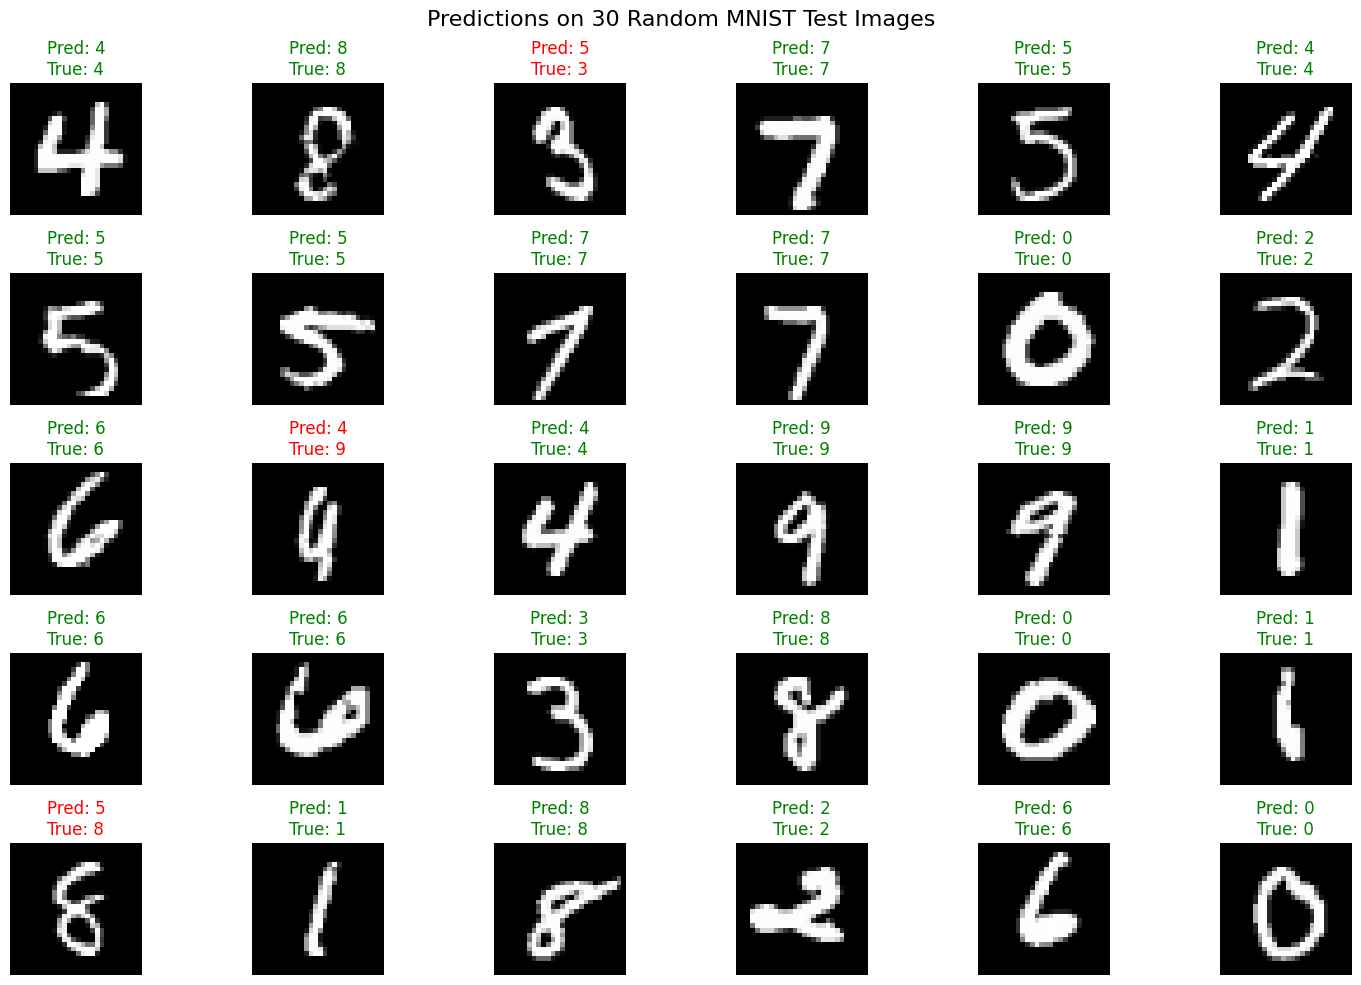

In [8]:
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(5, 6, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}",
              color='green' if predicted_labels[i] == true_labels[i] else 'red')
    plt.axis('off')

plt.suptitle("Predictions on 30 Random MNIST Test Images", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
correct = np.sum(predicted_labels == true_labels)
print(f"\nCorrect predictions: {correct}/{num_images} ({correct/num_images*100:.1f}%)")


Correct predictions: 27/30 (90.0%)
